## ProjF3 - Baseline Model

Use this document as a template to provide the evaluation of your baseline model. You are welcome to go in as much depth as needed.

Make sure you keep the sections specified in this template, but you are welcome to add more cells with your code or explanation as needed.

### 1. Load and Prepare Data

This should illustrate your code for loading the dataset and the split into training, validation and testing. You can add steps like pre-processing if needed.

In [1]:
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def load_data(data_dir, img_size=(128, 128)):
    classes = sorted(os.listdir(data_dir))
    num_classes = len(classes)
    X = []
    y = []

    for class_idx, class_name in enumerate(classes):
        class_dir = os.path.join(data_dir, class_name)
        for img_name in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_name)
            img = load_img(img_path, target_size=img_size)
            img_array = img_to_array(img)
            X.append(img_array.flatten())  # Flattening the image array
            y.append(class_idx)
    
    X = np.array(X)
    y = np.array(y)
    
    return X, y

data_dir = "C:/Users/pranj/Downloads/dataset/plantvillage dataset/color"
X, y = load_data(data_dir)

# Splitting data into train, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### 2. Prepare your Baseline Model

Here you can have your code to either train (e.g., if you are building it from scratch) or load (e.g., in the case that you are loading a pre-trained model) your model. These steps may require you to use other packages or python files. You can just call them here. You don't have to include them in your submission. Remember that we will be looking at the saved outputs in the notebooked and we will not run the entire notebook.

In [3]:
# Initialize Random Forest Classifier with fewer estimators
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

### 3. Baseline Performance

Make sure to include the following:
- Performance on the training set
- Performance on the test set
- Provide some screenshots of your output (e.g., pictures, text output, or a histogram of predicted values in the case of tabular data). Any visualization of the predictions are welcome.

Training Accuracy: 1.0
Test Accuracy: 0.6246202007181659


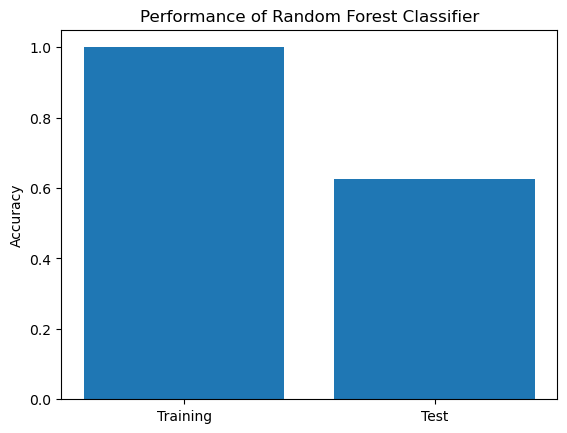

In [4]:
# Performance on the training set
train_predictions = rf_classifier.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)
print("Training Accuracy:", train_accuracy)

# Performance on the test set
test_predictions = rf_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print("Test Accuracy:", test_accuracy)

# Plot training history
import matplotlib.pyplot as plt

plt.bar(['Training', 'Test'], [train_accuracy, test_accuracy])
plt.ylabel('Accuracy')
plt.title('Performance of Random Forest Classifier')
plt.show()


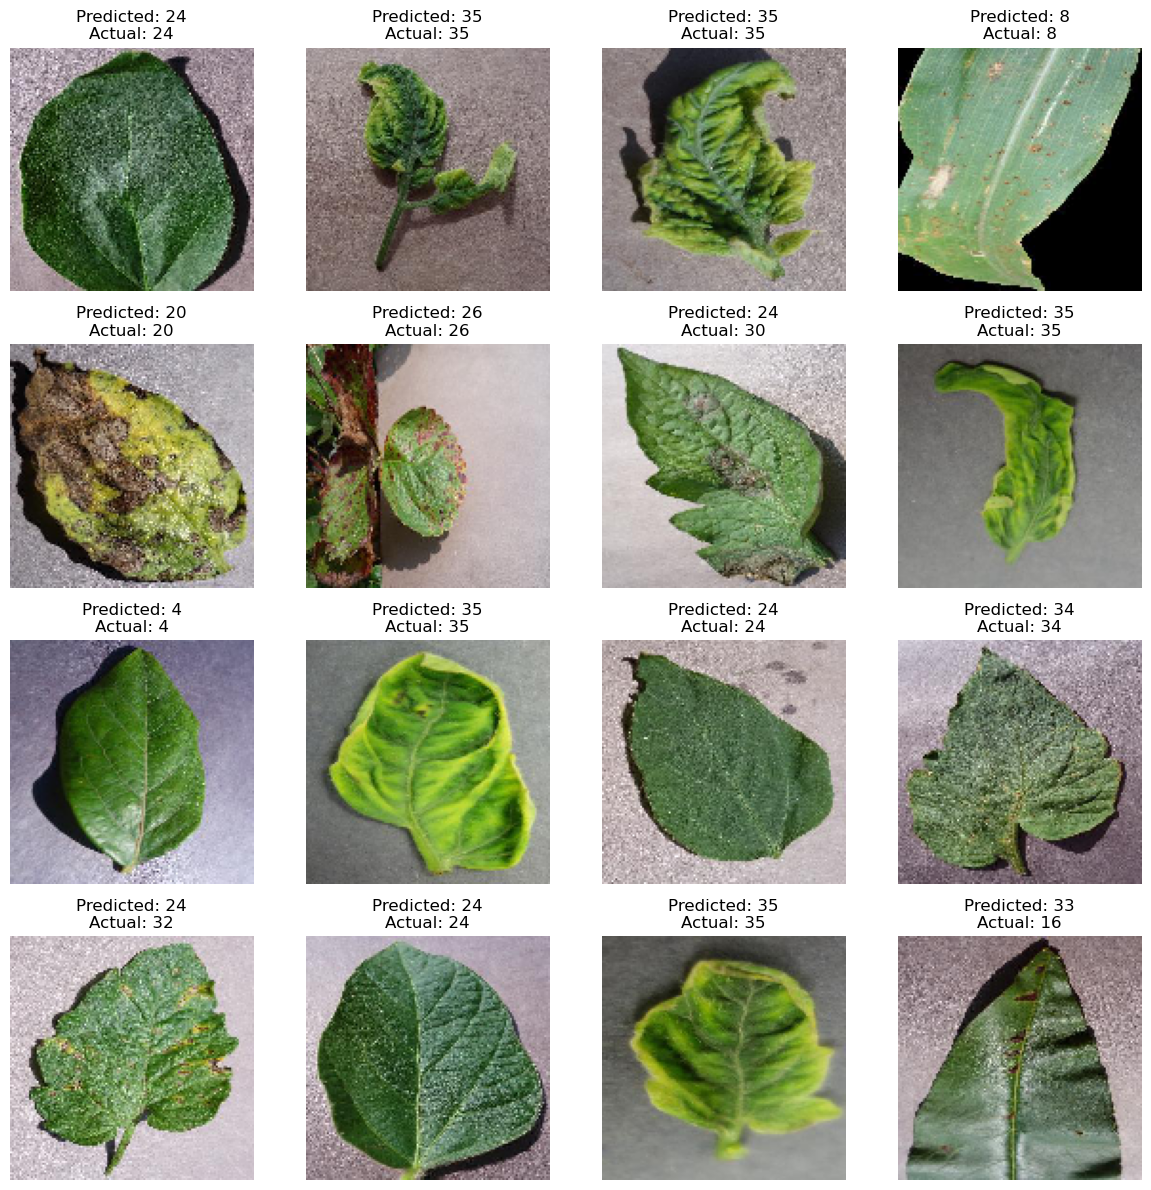

In [5]:
import matplotlib.pyplot as plt

# Generate some sample predictions from the test set
sample_indices = np.random.choice(len(X_test), size=16, replace=False)
sample_images = X_test[sample_indices]
sample_labels = y_test[sample_indices]
sample_predictions = rf_classifier.predict(sample_images)

# Define class names
class_names = {idx: class_name for class_name, idx in enumerate(np.unique(y))}

# Display sample predictions along with their actual labels
fig, axes = plt.subplots(4, 4, figsize=(12, 12))

for i, ax in enumerate(axes.flat):
    img = sample_images[i].reshape((128, 128, 3)).astype(np.uint8)  # Reshape image to original dimensions
    ax.imshow(img)
    predicted_class_name = class_names[sample_predictions[i]]
    actual_class_name = class_names[sample_labels[i]]
    ax.set_title(f"Predicted: {predicted_class_name}\nActual: {actual_class_name}")
    ax.axis('off')

plt.tight_layout()
plt.savefig('sample_predictions_rf.png')
plt.show()
